# Registering a dataset that will exist in the future

## Here we use a freva plugin run that has been applied

In [24]:
import freva
import xarray as xr
from freva._futures import Futures
hist_id = 3085 # We can get this ID using the freva.history command
_ = Futures.register_future_from_history_id(hist_id)

## Let's search for the data

In [23]:
list(freva.databrowser(variable="tx90petccdi"))

['future:///scratch/b/b380001/futures/6def5135a687932d27f419a3e993b5bd68aa03425ff0378cfb7745c0aef497a5/cmip5/output1/mpi-m/mpi-esm-lr/historical/yr/atmos/1day/r1i1p1/tx90pETCCDI/tx90pETCCDI_1day_mpi-esm-lr_historical_r1i1p1_199007020000-199207011200']

## The  data doesn't exist yet, but can be created on demand:

In [25]:
dset = xr.open_mfdataset(
    freva.databrowser(variable="tx90petccdi", 
                      execute_future=True
    )
)
dset

Output()

<xarray.Dataset>
Dimensions:      (time: 3, bnds: 2, lon: 192, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1990-07-02 1991-07-02 1992-07-01T12:00:00
  * lon          (lon) float64 -179.1 -177.2 -175.3 -173.4 ... 175.3 177.2 179.1
  * lat          (lat) float64 -89.06 -87.19 -85.31 -83.44 ... 85.31 87.19 89.06
    height       float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) datetime64[ns] dask.array<chunksize=(3, 2), meta=np.ndarray>
    tx90pETCCDI  (time, lat, lon) float32 dask.array<chunksize=(3, 96, 192), meta=np.ndarray>
Attributes: (12/36)
    CDI:                      Climate Data Interface version 2.0.5 (https://m...
    Conventions:              CF-1.4
    source:                   MPI-ESM-LR 2011; URL: http://svn.zmaw.de/svn/co...
    institution:              Max Planck Institute for Meteorology
    institute_id:             MPI-M
    experiment_id:            historical
    ...                       ...
    ETCCDI_software:          climdex.pcic
    ETCCDI_software_version:  1.1.11
    frequency:                yr
    creation_date:            2023-09-11T19:57:50Z
    title:                    ETCCDI indices computed on MPI-ESM-LR model out...
    CDO:                      Climate Data Operators version 2.0.5 (https://m...

### The data has been loaded, we can work with it (plot it)

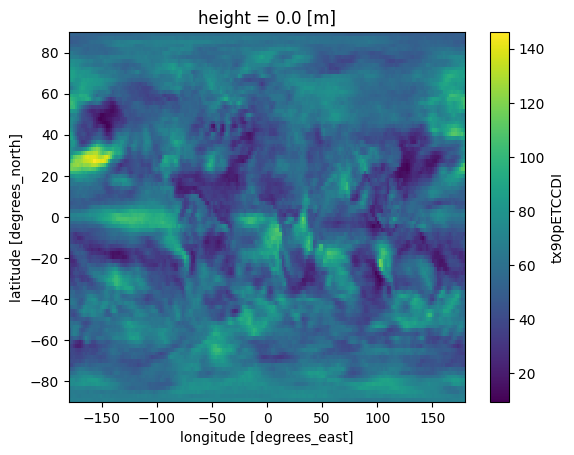

In [36]:
dset.sum(dim="time")["tx90pETCCDI"].plot()

## What happens if the data get's lost?

Let's delete the data:

In [32]:
!rm -fr /scratch/b/b380001/futures/6def5135a687932d27f419a3e993b5bd68aa03425ff0378cfb7745c0aef497a5

The data is still in the databrowser:

In [37]:
list(freva.databrowser(variable="tx90petccdi"))

['/scratch/b/b380001/futures/6def5135a687932d27f419a3e993b5bd68aa03425ff0378cfb7745c0aef497a5/cmip5/output1/mpi-m/mpi-esm-lr/historical/yr/atmos/yr/r1i1p1/v20230911/tx90pETCCDI/tx90pETCCDI_yr_mpi-esm-lr_historical_r1i1p1_199007020000-199207011200.nc']

Because of that the data can be re-created:

In [35]:
dset = xr.open_mfdataset(
    freva.databrowser(variable="tx90petccdi",
                      execute_future=True
    )
)
dset

Output()

<xarray.Dataset>
Dimensions:      (time: 3, bnds: 2, lon: 192, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1990-07-02 1991-07-02 1992-07-01T12:00:00
  * lon          (lon) float64 -179.1 -177.2 -175.3 -173.4 ... 175.3 177.2 179.1
  * lat          (lat) float64 -89.06 -87.19 -85.31 -83.44 ... 85.31 87.19 89.06
    height       float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) datetime64[ns] dask.array<chunksize=(3, 2), meta=np.ndarray>
    tx90pETCCDI  (time, lat, lon) float32 dask.array<chunksize=(3, 96, 192), meta=np.ndarray>
Attributes: (12/36)
    CDI:                      Climate Data Interface version 2.0.5 (https://m...
    Conventions:              CF-1.4
    source:                   MPI-ESM-LR 2011; URL: http://svn.zmaw.de/svn/co...
    institution:              Max Planck Institute for Meteorology
    institute_id:             MPI-M
    experiment_id:            historical
    ...                       ...
    ETCCDI_software:          climdex.pcic
    ETCCDI_software_version:  1.1.11
    frequency:                yr
    creation_date:            2023-09-11T20:05:11Z
    title:                    ETCCDI indices computed on MPI-ESM-LR model out...
    CDO:                      Climate Data Operators version 2.0.5 (https://m...